<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_Hello_World_with_QPU_IBM_runtime_Primitive_EstimatorV2_Qiskit_1_2_4_mkbahk_20241013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [ ]:
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-ibm-runtime==0.30.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c76d2123af7cb64c4206a66bee226af0c42c3a35cc9a2f8abc19dc5eb145ba57
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Quantum Workflow
00_start_qiskit_patterns_diagram.svg

##Step 1. Set up an Quantum Runtime Service channel

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_quantum", token="56d517b9c8e16472af2d73eb795e32367a186f609dfa83496f7ff9d785df3aa222ca905e09d226505791c6ff53eca4a23114a35682875fa984edaf3fbec4fc06")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="7901a13d659a804b7dc1ec1d7c00c2d729636c4ee20eabe6c916e3e94e9d80fd0203795da14b64e8c48923ad2e2e3bbad72f1bebb95b5701126d01b4d3fae122",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [ ]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend("ibm_brisbane")

In [ ]:
print(backend)

<IBMBackend('ibm_brisbane')>


## Step 2: Map the problem to a quantum-native format

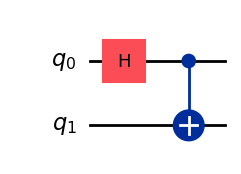

In [ ]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

Qiskit-runtime-Service는 이전의 확률분포 반환에서 추가적으로 데이터를 반환하는 두 가지 방법을 제공합니다.
1.   측정하기로 선택한 큐비트 집합에 대한 확률 분포

```
# 회로 실행 및 결과 얻기
job = sampler.run(circuit)
result = job.result()
counts = result.quasi_dists[0]
# 결과 출력
print(counts)
```

2.   관측 가능한 값의 기대값

```
# 회로 실행 및 결과 얻기
job = estimator.run(observable, circuit)
result = job.result()
expectation_value = result.values[0]
# 결과 출력
print(expectation_value)
```
아래는 observable를 이용한 "관측가능한 기대값"을 리턴하는 방법의 예입니다.


In [ ]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

## Step 4: Optimize the circuits and operators

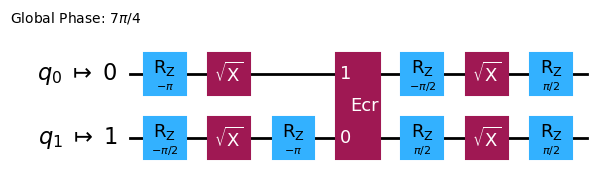

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

## Step 6: Execute using the real QPU primitives

In [ ]:
# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 100

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cw5qmwbxa9wg0082qgm0


# Async 방식으로 QPU를 제공하는 Cloud Platform에서 Job State가 완료된 것을 확인한 후 아래의 코드를 기동합니다.

In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

## Step 7: Post-Processing

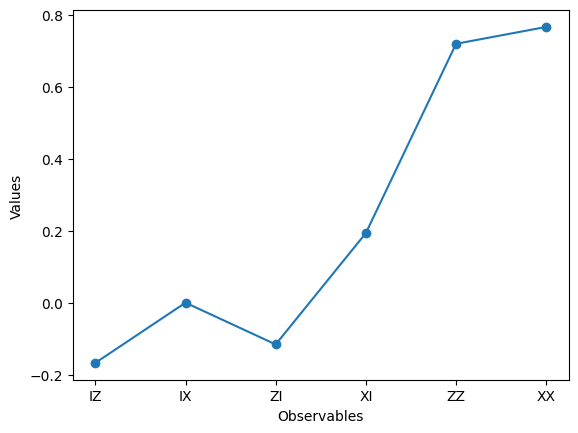

In [ ]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()